In [1]:
# Import the pathlib and csv library
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import random
import numpy as np
import plotly.express as px
from MCForecastFantasy import MCSimulation

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\zacha\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Import all the relevant data sets and combine into a single player dataframe

In [2]:
#Setting the different CSV paths
data_2015_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2015.csv")
data_2016_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2016.csv")
data_2017_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2017.csv")
data_2018_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2018.csv")
data_2019_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2019.csv")
data_2020_path = Path("./Resources/Historic_Data/fanduel_salary_production/NFL-HistoricalProduction_2020.csv")

In [3]:
#Reading in the CSV into into seperate dataframes
df_1 = pd.read_csv(data_2015_path)
df_2 = pd.read_csv(data_2016_path)
df_3 = pd.read_csv(data_2017_path)
df_4 = pd.read_csv(data_2018_path)
df_5 = pd.read_csv(data_2019_path)
df_6 = pd.read_csv(data_2020_path)

In [4]:
#Appending a column "Year" for each dataframe
df_1['Year'] = 2015

df_2['Year'] = 2016

df_3['Year'] = 2017

df_4['Year'] = 2018

df_5['Year'] = 2019

df_6['Year'] = 2020


In [5]:
#Concating all dataframes into one 
combined_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6], axis='rows', join='inner')
combined_df.reset_index(inplace=True)


In [6]:
#Drop Columns
combined_df.drop(['DKSal','DK Points','index'], axis = 1, inplace=True)
#combined_df
combined_df['Year/Week'] = combined_df['Year']+combined_df['Week']/100
combined_df.round(decimals = 2)
combined_df['Year/Week'] = combined_df['Year/Week'].apply(str)

#sort dataframe by player and year/week
combined_df_2 = combined_df.sort_values(by=['Player', 'Year/Week'])

#rename columns
combined_df_2.rename(columns={'FD Points': "Points","FDSal": "Salary","P":"Position"},inplace= True)

#check for null values
combined_df_2.isnull().sum()

Position             0
Player               0
Week                 0
Team                 0
Opp                  0
Opp Position Rank    0
Salary               0
Points               0
Year                 0
Year/Week            0
dtype: int64

In [7]:

combined_df_2.dtypes

Position              object
Player                object
Week                   int64
Team                  object
Opp                   object
Opp Position Rank      int64
Salary                 int64
Points               float64
Year                   int64
Year/Week             object
dtype: object

In [8]:
#combined_df.dtypes

In [9]:


combined_df_2

,Position,Player,Week,Team,Opp,Opp Position Rank,Salary,Points,Year,Year/Week
36606,WR,A.J. Brown,1,TEN,CLE,11,5100,11.5,2019,2019.01
38173,WR,A.J. Brown,2,TEN,IND,16,5400,4.0,2019,2019.02
39545,WR,A.J. Brown,3,TEN,JAX,21,5200,0.9,2019,2019.03
35564,WR,A.J. Brown,4,TEN,ATL,12,4700,22.9,2019,2019.04
38256,WR,A.J. Brown,5,TEN,BUF,3,5600,3.7,2019,2019.05
38390,WR,A.J. Brown,6,TEN,DEN,4,5400,3.3,2019,2019.06
36985,WR,A.J. Brown,7,TEN,LAC,6,5300,9.2,2019,2019.07
37182,WR,A.J. Brown,8,TEN,TB,30,5500,8.1,2019,2019.08
36846,WR,A.J. Brown,9,TEN,CAR,14,5500,10.1,2019,2019.09
38839,WR,A.J. Brown,10,TEN,KC,8,5500,2.2,2019,2019.1


In [10]:
#Create Function which allows you to easily filter the dataframe
"""
Arguments:
    df : pandas.Dataframe
        the main data frame you pass to the filter function
    players: list (optional)
        a list of player names
    year: list (optional)
        a list of years for which you want data
    position: list (optional)
        a list of positions for which you want data
    team: list (optional)
        a list of teams for which you want data
    not_points: list (optional)
        a list of point values you want to exclude (ex. may want to exclude zero point games)

"""
    



def choose_roster(df, players=[], year=[], position=[],team=[], not_points=[]):
    #filter based on player name
    if len(players)>0:    
        df=df[df['Player'].isin(players)]
    
    #filter based on year
    if len(year)>0:
        df=df[df['Year'].isin(year)]
     
    #filter based on position
    if len(position)>0:
        df=df[df['Position'].isin(position)]
    
    #filter based on team
    if len(team)>0:
        df=df[df['Team'].isin(team)]
    
    #remove entries with certain point values    
    if len(not_points)>0:
        df=df[~df['Points'].isin(not_points)] 
        
    return df


In [11]:
#Example of utilizing the filter uncomment the below to try
#choose_roster(combined_df_2, team=['NYJ'],position=["TE"],year=["2020"])

# Historic Visualizations

In [12]:
#Visualization of Player Production Per Week
choose_roster(combined_df_2,not_points=[0]).hvplot.bar(x='Year/Week',y="Points",ylabel='Points',groupby='Player',rot=90)




:DynamicMap   [Player]
   :Bars   [Year/Week]   (Points)

In [13]:
choose_roster(combined_df_2,not_points=[0]).hvplot.box(y="Points",by="Year",groupby='Player', rot=90)

:DynamicMap   [Player]
   :BoxWhisker   [Year]   (Points)

In [14]:
(choose_roster(combined_df_2,not_points=[0],position=["TE","WR","QB","RB"]).sort_values(by="Year").groupby(["Year","Position","Player"]).mean()).hvplot.box(y="Points",by="Position",groupby='Year', rot=90)

:DynamicMap   [Year]
   :BoxWhisker   [Position]   (Points)

In [15]:
(choose_roster(combined_df_2,not_points=[0],position=["TE","WR","QB","RB"]).sort_values(by="Year").groupby(["Year","Position","Player"]).mean()).hvplot.box(y="Points",by="Year",groupby="Position",rot=90)

:DynamicMap   [Position]
   :BoxWhisker   [Year]   (Points)

# Monte Carlo Simulations
## Run for Roster 1

In [16]:
#Initialize Roster
roster1=["Drew Brees", "Christian McCaffrey","Alvin Kamara","A.J. Brown","Tyreek Hill","Mark Andrews","Kenny Golladay"]
history=[2018,2019,2020]

#Display Roster Overview
choose_roster(combined_df_2, players=roster1, year=history, not_points=[0])[["Position","Player","Team","Points"]].groupby(["Position", "Player","Team"]).mean()



Points
Position Player              Team           
QB       Drew Brees          NO    20.477647
RB       Alvin Kamara        NO    19.008649
         Christian McCaffrey CAR   23.628571
TE       Mark Andrews        BAL    8.897368
WR       A.J. Brown          TEN   13.095455
         Kenny Golladay      DET   12.668571
         Tyreek Hill         KC    16.750000

In [17]:

#Initialize MC_roster object
player_1=choose_roster(combined_df_2,players=roster1,year=history,not_points=[0])

num_sims=1000
games=13

MC_roster1=MCSimulation(
    roster=player_1,
    number_simulation=num_sims,
    number_game=games


)

In [18]:
MC_roster1.calc_points()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,146.415541,69.198360,95.767398,93.358063,86.628622,113.125793,98.767488,68.238305,141.539386,104.298181,...,178.348399,91.725359,134.853530,97.852467,124.961800,122.429567,107.411676,107.710987,94.399098,101.264659
1,277.472067,205.324635,209.495609,190.738299,215.393270,256.792040,196.744126,165.383780,226.110088,211.595623,...,256.471413,239.684670,258.083866,213.329386,241.192616,228.809789,216.843319,208.647323,195.932966,162.472351
2,400.151312,330.183377,320.793111,338.564385,354.368207,398.346221,301.896186,244.009539,337.396164,334.024892,...,331.051133,309.470788,333.844097,322.256158,401.066774,332.505168,334.798538,334.787866,300.527657,287.196064
3,494.835134,442.869970,436.555228,445.841787,484.297985,497.248295,413.100580,347.178756,433.907162,436.951079,...,428.707484,393.211554,427.970356,458.373029,477.108150,454.313115,475.614902,384.181389,390.266437,424.721210
4,613.216280,558.760822,553.553817,549.545871,602.547398,602.822938,530.080966,423.114544,573.400378,572.771298,...,547.883879,535.400022,529.169055,584.537255,590.533183,559.223218,546.311496,486.941367,488.413446,561.178371
5,701.524043,683.179156,615.355648,676.296891,729.452406,719.899343,642.229087,542.261345,722.285673,684.888387,...,708.677075,689.230852,612.113043,685.494175,702.947180,671.229529,671.178880,603.081548,640.253399,652.805546
6,825.004779,796.303187,710.975768,768.261930,838.016467,832.643673,745.730198,634.113280,803.081135,823.878971,...,837.407592,815.851826,724.195617,790.467624,809.917491,737.534745,779.274448,706.120307,754.586706,771.210582
7,952.682223,914.089868,832.300700,876.568465,918.651495,919.292480,860.038589,750.758442,885.875584,929.305713,...,983.818144,908.045460,834.313191,934.648458,928.365161,874.048612,879.569519,810.744694,864.034328,876.489294
8,1092.974640,998.448869,960.517553,1022.313494,1040.296881,1084.908056,986.302602,871.948155,984.286407,1052.065525,...,1115.077536,992.265923,944.302037,1067.040301,1029.323455,1011.186042,994.160004,909.404926,944.037364,993.437885
9,1197.102332,1144.368413,1064.414133,1131.454789,1136.291910,1231.531289,1085.995556,946.841651,1069.646439,1201.408383,...,1219.591857,1125.418626,1091.152553,1191.947276,1133.111855,1112.545584,1091.952245,1013.035986,993.831308,1112.824171


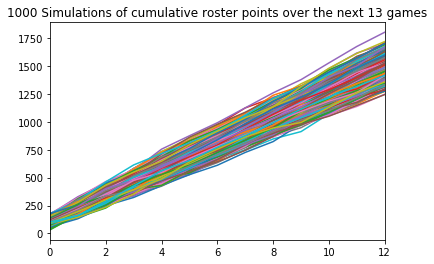

In [19]:
MC_roster1.plot_szn_simulation()

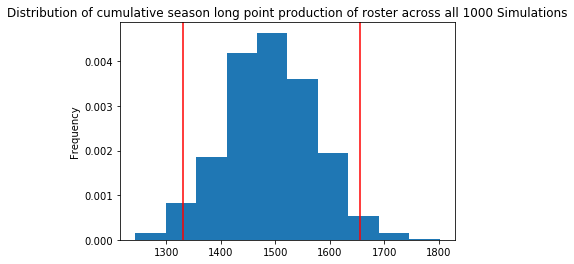

In [20]:
MC_roster1.plot_szn_distribution()

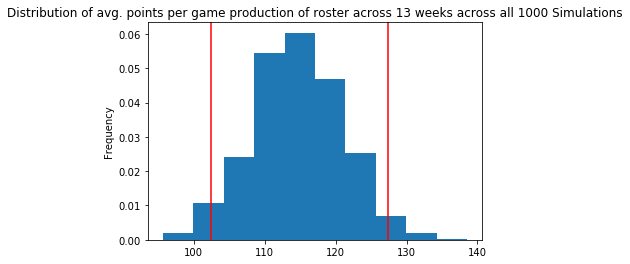

In [21]:
MC_roster1.plot_avg_szn_distribution()

In [22]:
MC_roster1.summarize_szn_points()

count           1000.000000
mean            1490.152303
std               82.442725
min             1243.202968
25%             1432.897585
50%             1488.578065
75%             1546.515148
max             1801.122004
95% CI Lower    1331.261935
95% CI Upper    1655.838406
Name: 12, dtype: float64

In [23]:
MC_roster1.summarize_avg_szn_points()

count           1000.000000
mean             114.627100
std                6.341748
min               95.630998
25%              110.222891
50%              114.506005
75%              118.962704
max              138.547846
95% CI Lower     102.404764
95% CI Upper     127.372185
Name: 12, dtype: float64

In [24]:
#for i in MC_roster1.szn_end_points:
    #print (i)


## Run for Roster 2

In [25]:
 #Initialize Roster
roster2=["Aaron Rodgers", "Derrick Henry","Aaron Jones","Michael Thomas","Julio Jones","Travis Kelce","Tyler Lockett"]
history=[2018,2019,2020]

#Display Roster Overview
choose_roster(combined_df_2, players=roster2, year=history, not_points=[0])[["Position","Player","Team","Points"]].groupby(["Position", "Player","Team"]).mean()


Points
Position Player         Team           
QB       Aaron Rodgers  GB    19.627000
RB       Aaron Jones    GB    16.620588
         Derrick Henry  TEN   16.022051
TE       Travis Kelce   KC    14.360976
WR       Julio Jones    ATL   15.715789
         Michael Thomas NO    16.585294
         Tyler Lockett  SEA   13.284615

In [26]:
player_2=choose_roster(combined_df_2,players=roster2,year=history,not_points=[0])

num_sims=1000
games=13

#Initialize object
MC_roster2=MCSimulation(
    roster=player_2,
    number_simulation=num_sims,
    number_game=games

)

In [27]:
MC_roster2.calc_points()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,144.376507,91.795572,116.820631,129.499231,109.046726,82.633384,114.686422,121.977475,78.539297,136.455794,...,81.194505,121.316854,81.736075,82.277946,134.066355,113.691411,138.882962,125.560560,104.522292,116.171058
1,262.039895,238.884472,252.402648,243.719949,242.202066,222.044019,233.282620,191.357596,202.460684,260.120499,...,265.905583,226.682357,157.594146,221.662556,234.251111,235.633815,235.700618,223.588285,225.594478,173.264073
2,398.349860,321.596338,376.187441,341.601893,360.892025,362.991894,371.530275,267.167914,348.674896,398.459495,...,364.026265,374.982072,260.967829,350.831312,343.836103,344.477239,335.432677,355.554178,332.237619,226.920732
3,462.014589,451.275846,504.473337,446.883790,418.787002,463.263273,474.367922,364.152935,481.268861,473.273259,...,507.675163,508.828602,420.115354,443.512633,439.875622,451.540706,465.179191,488.248223,495.448039,291.799801
4,638.741734,523.883668,614.287299,599.922003,506.833100,602.252096,550.015202,483.417483,591.935784,579.949569,...,612.777598,568.410636,552.937920,549.302724,535.843185,542.978265,591.786704,625.921787,561.150725,393.866862
5,761.767979,667.714098,735.060046,699.675100,623.703904,715.350884,654.187608,580.423181,661.851153,686.318693,...,712.416469,678.029764,698.235564,641.571239,616.908844,694.180713,721.867073,742.323313,685.469394,559.127690
6,839.779569,775.422285,817.939258,803.005568,732.431832,811.816314,772.741041,689.818133,815.140147,795.074344,...,777.532603,791.287091,792.627715,739.035156,732.655525,845.060249,804.753392,878.222494,807.059765,688.902279
7,964.487843,876.784459,929.914467,898.741847,855.138393,867.023390,856.336841,843.422142,933.724248,874.646220,...,889.042258,880.382791,920.963891,829.308278,863.625468,928.729189,915.408454,981.859604,953.209679,820.584755
8,1084.857424,954.016149,1051.610169,984.013132,982.805539,990.029798,996.222175,995.807043,1052.532899,997.775684,...,981.573987,992.231863,1030.695135,990.994845,998.340530,1004.753146,1039.042595,1121.465142,1044.243168,936.876012
9,1181.362327,1056.963867,1162.478943,1138.755247,1068.594463,1115.535006,1137.563390,1100.764700,1194.100070,1112.137821,...,1075.485707,1109.298709,1140.391463,1122.432005,1081.619574,1136.235001,1109.386481,1227.798886,1139.445953,1062.129759


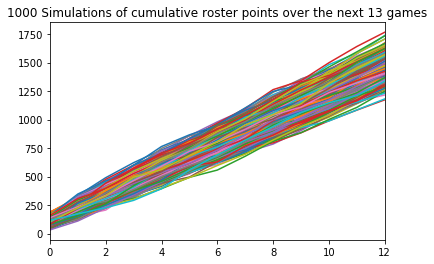

In [28]:
MC_roster2.plot_szn_simulation()

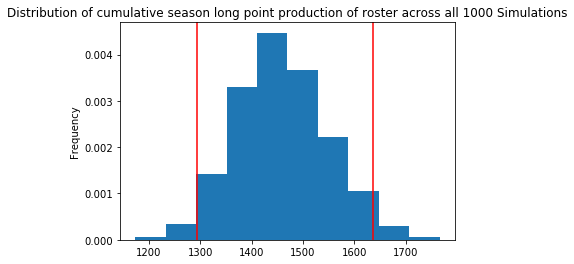

In [29]:
MC_roster2.plot_szn_distribution()

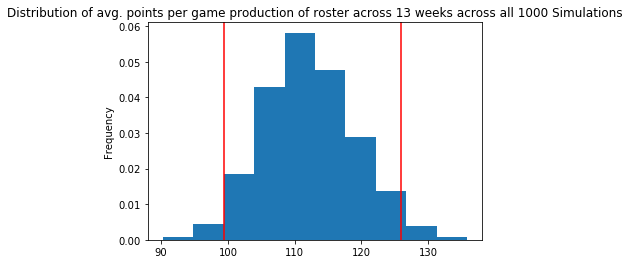

In [30]:
MC_roster2.plot_avg_szn_distribution()

In [31]:
MC_roster2.summarize_szn_points()

count           1000.000000
mean            1458.673654
std               89.138669
min             1173.211375
25%             1394.953134
50%             1454.520123
75%             1517.648439
max             1765.820270
95% CI Lower    1292.645983
95% CI Upper    1636.550196
Name: 12, dtype: float64

In [32]:
MC_roster2.summarize_avg_szn_points()

count           1000.000000
mean             112.205666
std                6.856821
min               90.247029
25%              107.304087
50%              111.886163
75%              116.742188
max              135.832328
95% CI Lower      99.434306
95% CI Upper     125.888477
Name: 12, dtype: float64

In [33]:
MC_roster2.szn_end_points[1]

1374.268485878758

# Bet on a Roster
## Compare each simulation and determine a fair bet on Roster 1 vs. Roster 2

In [34]:
def odds_calculator(roster1, roster2):
    trials=min(len(roster1),len(roster2))
    i=0
    winCount=0
    while i < trials:
        if roster1[i]>roster2[i]:
            winCount+=1
        i+=1
    
    winpercent=round(winCount/trials,4)*100
    odds=0
    
    if winpercent>=50:
        odds=round(winpercent/(1-(winpercent/100)),0)*-1
    else:
        odds=round((100/(winpercent/100))-100,0)
    
    
    return f"Roster 1 has {round(winpercent,2)}% chance of winning fair American odds are: {odds}"
        
    

In [35]:
odds_calculator(MC_roster1.szn_end_points,MC_roster2.szn_end_points)

'Roster 1 has 61.0% chance of winning fair American odds are: -156.0'